# Crack Detection


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<a id = "1"></a><br>
# Load Dataset

In [2]:
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('../input/surface-crack-detection')

<a id = "2"></a><br>
# Visualizing the Dataset

Text(0.5, 1.0, 'Number of Images')

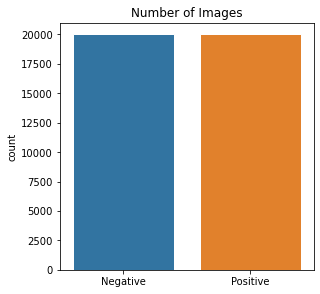

In [3]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

<a id = "3"></a><br>
# Normalization of image data

In [4]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

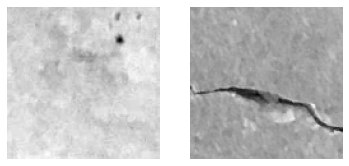

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

<a id="4"></a><br>
# Convolutional Neural Networks (CNN)

Convolutional neural networks (CNN) serve as a neural network approach capable of processing 2-dimensional arrays, particularly images, comprising three color components (Lecun et al., 2010). Local features, known as edges, amalgamate into patterns within images, subsequently forming pieces, and further coalescing into objects (Bengio & Lecun, 1997). These characteristics are harnessed within the convolution layer, and subsequently integrated and processed in the pooling layer.

CNNs consist of input, output, and multiple hidden layers. Among them are the convolution layer, pooling layer, rectified linear unit layer (ReLu), fully connected layer, and classification sections (Lecun et al., 2010).

* **Convolution Layer**: Integral to CNNs, this layer executes multi-dimensional convolution processes. It facilitates adjustment of neurons in the input matrix, referred to as the feature map, enabling feature learning.

* **ReLu**: This layer flattens the post-convolution feature map. It converts negative values to zero, yielding outputs within the range of zero to positive infinity.

* **Pooling Layer**: Responsible for size reduction through subsampling operations (Kalchbrenner et al., 2014), preventing excessive memorization and aiding feature retention.

During CNN training, regularization techniques are applied. Data augmentation, vital for weight regularization, and batch normalization (Srivastava et al., 2014) are crucial. Dropout, a method employed, primarily aims to *counter overfitting*.

In [6]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

<a id="5"></a><br>
# **Training the Model**

* Raising the number of epochs can enhance accuracy.
* Learning rate holds significance; experimenting with various rates can yield improved outcomes. Optimal rate can be determined through trial and error or grid search, though this elongates training duration.

Opting for a low learning rate decelerates training, whereas a high rate accelerates it, yet jeopardizes accuracy.

In [7]:
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 15, batch_size = 128, validation_split = 0.25, verbose=1)

Epoch 1/15
235/235 [==============================] - 16s 55ms/step - loss: 0.4342 - accuracy: 0.7991 - val_loss: 0.4303 - val_accuracy: 0.9399
Epoch 2/15
235/235 [==============================] - 12s 50ms/step - loss: 0.0986 - accuracy: 0.9726 - val_loss: 0.1333 - val_accuracy: 0.9507
Epoch 3/15
235/235 [==============================] - 12s 50ms/step - loss: 0.0651 - accuracy: 0.9812 - val_loss: 0.0439 - val_accuracy: 0.9808
Epoch 4/15
235/235 [==============================] - 12s 50ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0605 - val_accuracy: 0.9747
Epoch 5/15
235/235 [==============================] - 12s 50ms/step - loss: 0.0486 - accuracy: 0.9863 - val_loss: 0.0564 - val_accuracy: 0.9773
Epoch 6/15
235/235 [==============================] - 12s 50ms/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.0506 - val_accuracy: 0.9803
Epoch 7/15
235/235 [==============================] - 12s 50ms/step - loss: 0.0373 - accuracy: 0.9900 - val_loss: 0.0830 - val_accuracy:

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<a id = "6"></a><br>
# **Graphs**

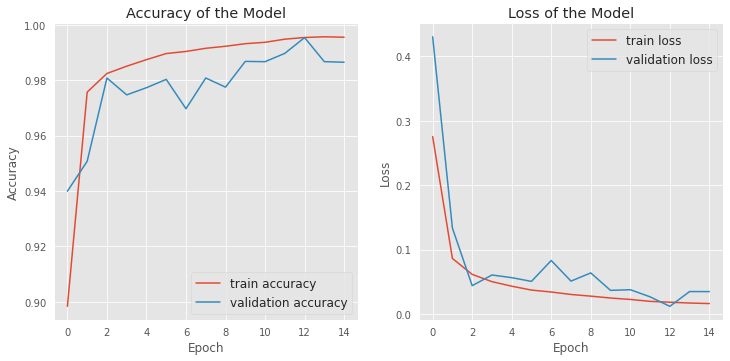

In [9]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

<a id = "7"></a><br>
# Classification Report

* The classification_report function builds a text report showing the main classification metrics. 

* **Precision** for each class, it is defined as the ratio of true positives to the sum of true and false positives.

* **Recall** for each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.
* **F1 scores** are lower than accuracy measures as they embed precision and recall into their computation.

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y, predictions, target_names = ['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99     20000
    Positive       1.00      0.99      0.99     20000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



# Thank You
